<a href="https://colab.research.google.com/github/elmedianikhadija/DEVOIRE-Ensemble_Learning/blob/main/DEVOIRE_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Learning

In [ ]:
import sys
import sklearn
import numpy as np
import os

np.random.seed(42)
random_state = 42

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Make_moons Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state = random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
X.shape

(500, 2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

# Decision Trees

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.856


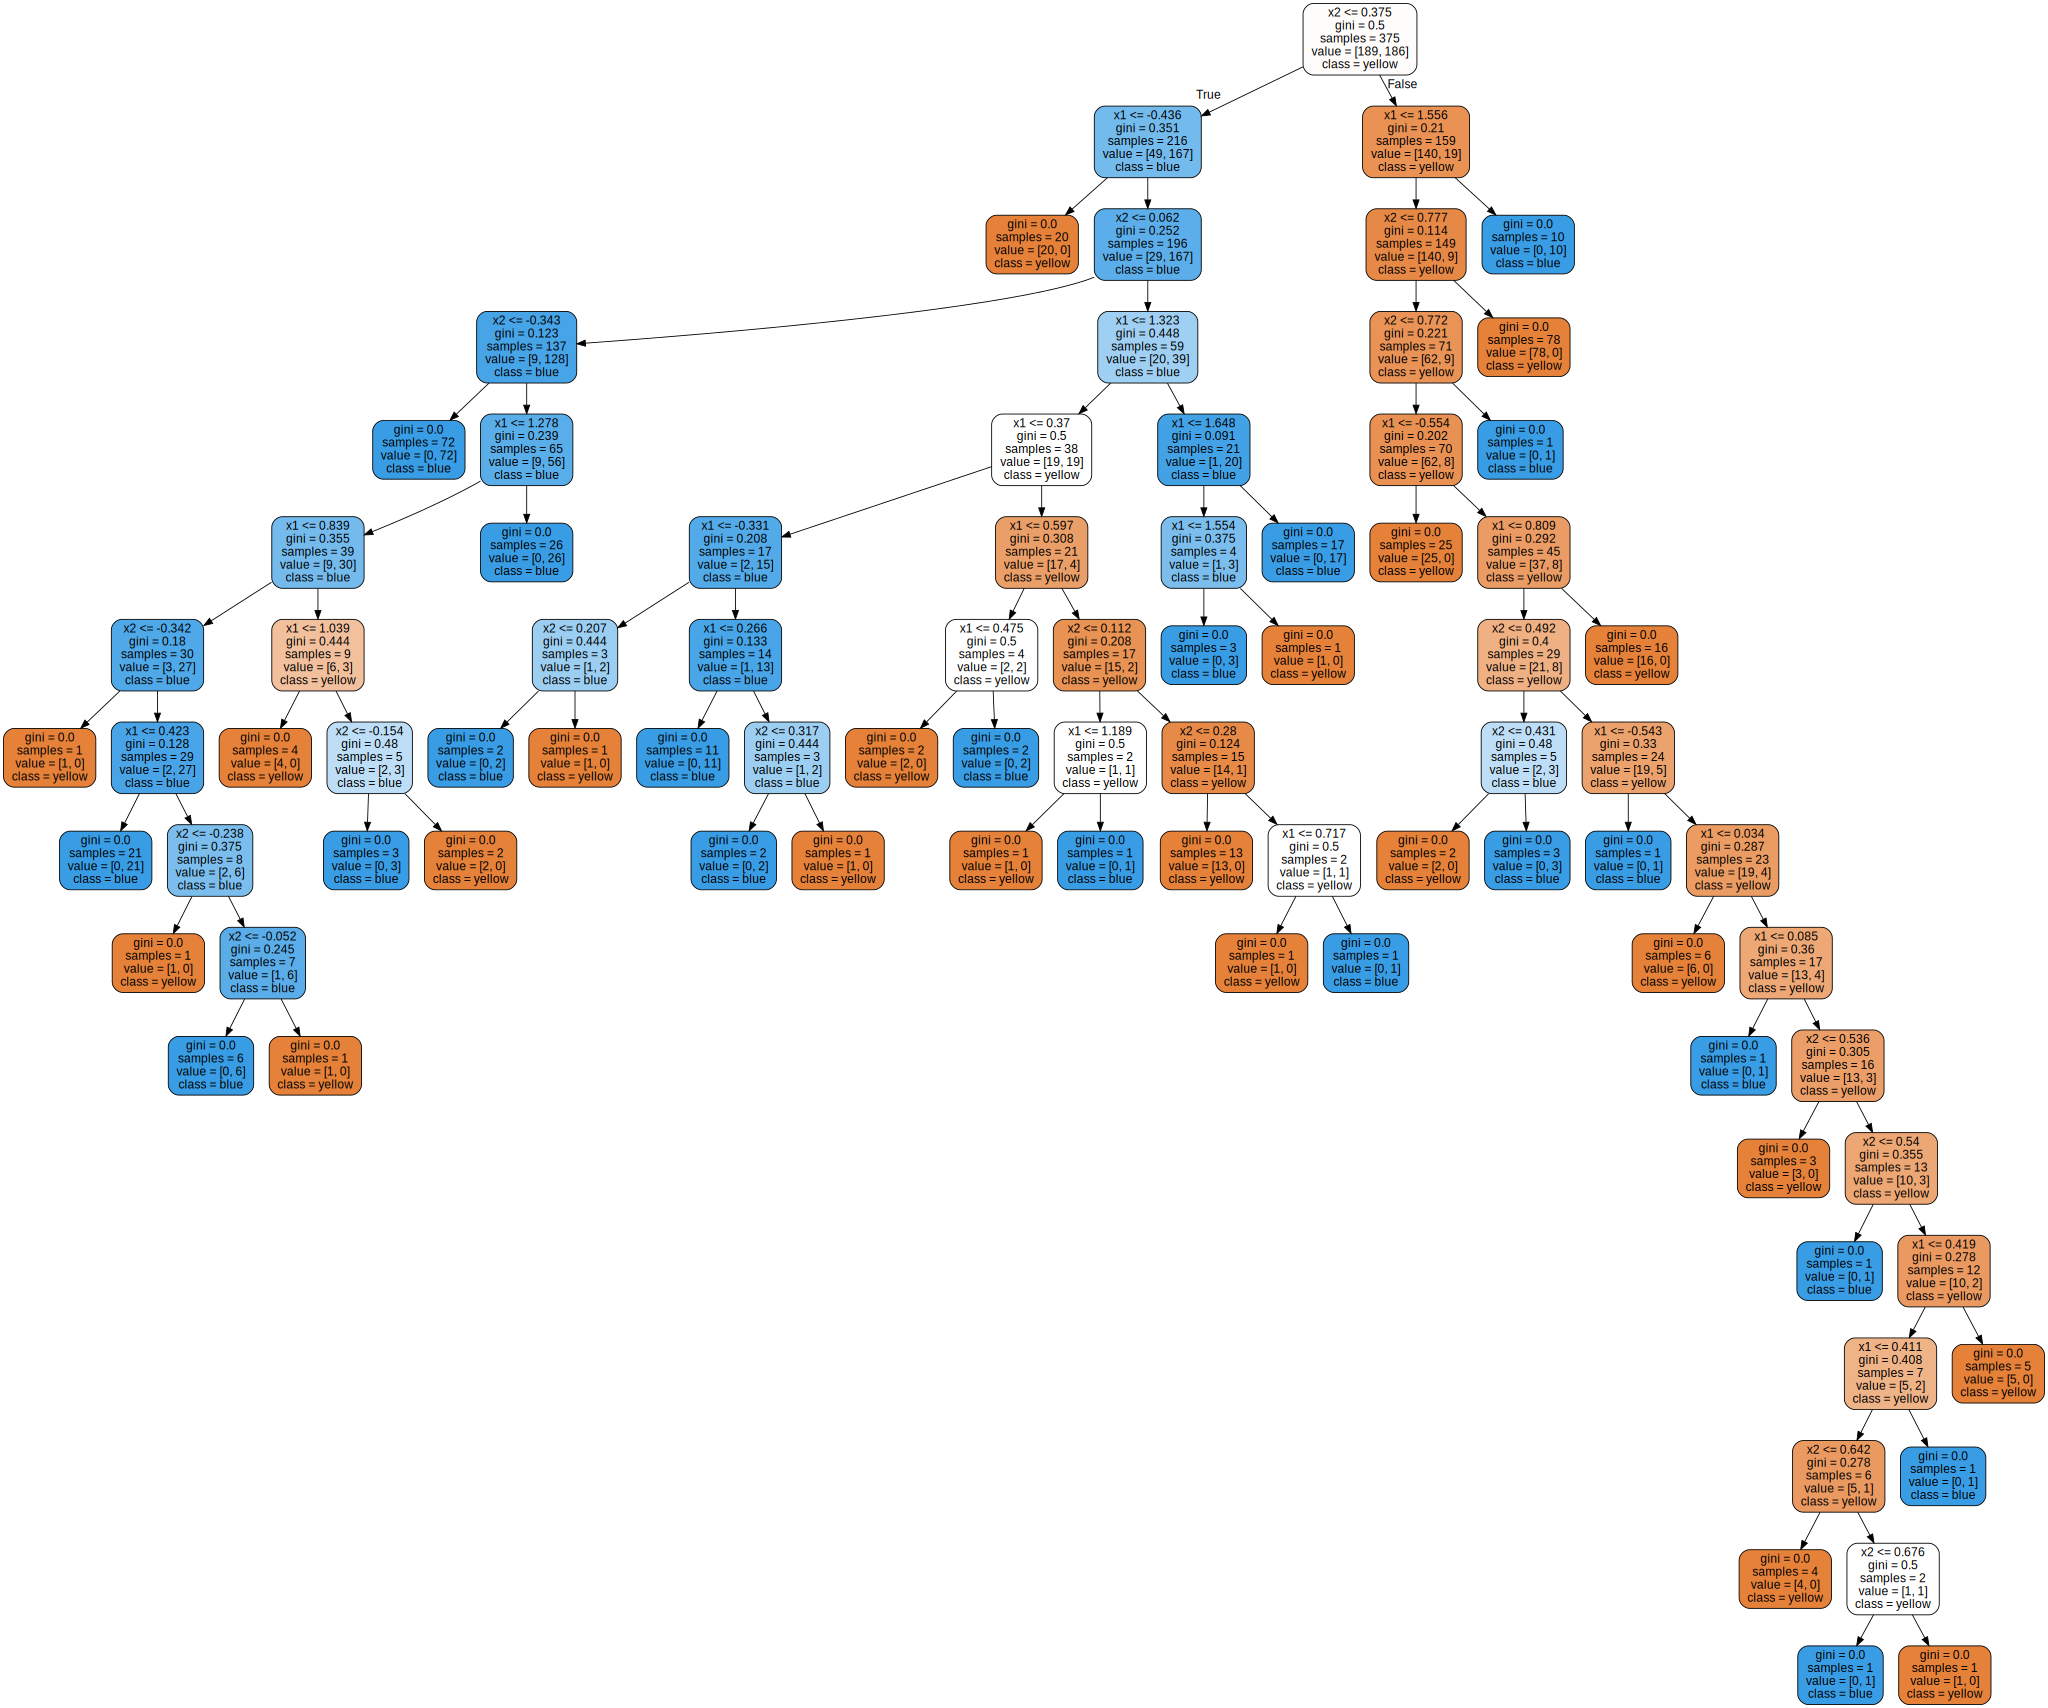

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
        tree_clf,
        out_file=None, 
        feature_names=["x1", "x2"],
        class_names=["yellow", "blue"],
        rounded=True,
        filled=True
    )
graph = Source(dot_data)  
graph

## Bagging

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)



Dans BaggingClassifier, si la classification est basée sur la catégorie de base peut estimer la probabilité de mots (par exemple, elle contient predict_proba méthode ()), il effectuera automatiquement un vote BaggingClassifier souple (vote souple), plutôt qu’un vote dur. Dans l’exemple ci-dessus, le classificateur de base est un arbre de décision, il effectue donc un vote souple.

le code ci-dessus entraînera un ensemble de 500 classificateurs d’arbre de décision (n_estimators), et chacun d’eux est entraîné sur 100 sous-ensembles aléatoires des données d’entraînement (max_samples) 



In [ ]:
print(accuracy_score(y_test, y_pred))

0.904


Sur la base de l’évaluation de random_state, ce BaggingClassfier pourrait atteindre un taux de précision de 90.4% sur l’ensemble de test, nous vérifions ce qui suit:

# Random Forest

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.904


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

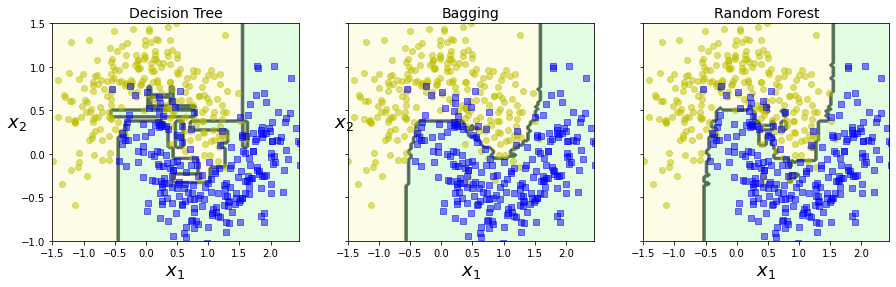

In [ ]:
fix, axes = plt.subplots(ncols=3, figsize=(15,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging", fontsize=14)
plt.sca(axes[2])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.ylabel("")
plt.show()

Si nous comparons un classificateur d’arbre de décision régulier avec le classificateur d’ensachage que nous venons de créer, les deux sont entraînés sur un jeu de données lunaires. En observant, la figure ci-dessUs, nous pouvons voir que L’ensemble est beaucoup plus généralisé qu’un arbre de décision individuel.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state = random_state)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state = random_state)
svm_clf = SVC(gamma="scale", probability=True, random_state = random_state)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state = random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)

In [ ]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


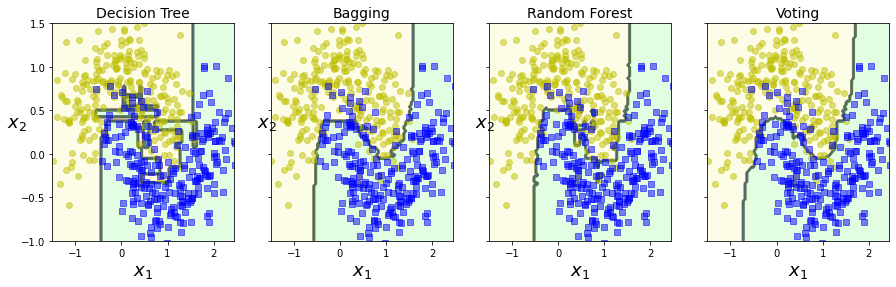

In [ ]:
fix, axes = plt.subplots(ncols=4, figsize=(15,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Bagging", fontsize=14)
plt.sca(axes[2])
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.sca(axes[3])
plot_decision_boundary(voting_clf, X, y)
plt.title("Voting", fontsize=14)
plt.ylabel("")
plt.show()

# SVC with Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30.],
         'gamma': [0.01, 0.03, 0.1]},
    ]

svm_clf = SVC()
svm_grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1', verbose=2)
svm_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 17 candidates, totalling 85 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0],
                          'gamma': [0.01, 0.03, 0.1], 'kernel': ['rbf']}],
             scoring='f1', verbose=2)

In [ ]:
svm_grid_search.best_score_

0.8901596789815969

In [ ]:
svm_grid_search.best_params_

{'C': 30.0, 'gamma': 0.1, 'kernel': 'rbf'}

Oob permet une évaluation automatisée. Le code suivant est un exemple montrant que les résultats de l’évaluation peuvent être obtenus par des variables fractionnaires oob_score_ :

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.896

Sur la base de l’évaluation de l’oob, ce BaggingClassfier pourrait atteindre un taux de précision de 89,8% sur l’ensemble de test, nous vérifions ce qui suit:

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.92

La précision sur l’ensemble de test était de 92%, les résultats sont proches.

La fonction de décision oob pour chaque ensemble d’entraînement est également disponible via oob_decision_funcsion_ variables. Dans l’exemple ci-dessus (en raison de la méthode predict_proba l’estimateur de base (), la fonction de prise de décision renverra la probabilité de chaque donnée d’entraînement qu’elle appartient à une catégorie. Par exemple, la première évaluation des données d’entraînement OOB 15.2% probabilité d’appartenir à la classe de positif, négative 84.7% probabilité d’appartenir à la classe.

In [ ]:
bag_clf.oob_decision_function_

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06145251, 0.93854749],
       [0.35465116, 0.64534884],
       [0.01142857, 0.98857143],
       [0.98930481, 0.01069519],
       [0.97927461, 0.02072539],
       [0.75586854, 0.24413146],
       [0.0049505 , 0.9950495 ],
       [0.75520833, 0.24479167],
       [0.82122905, 0.17877095],
       [0.98461538, 0.01538462],
       [0.06315789, 0.93684211],
       [0.00490196, 0.99509804],
       [0.99004975, 0.00995025],
       [0.92513369, 0.07486631],
       [1.        , 0.        ],
       [0.03409091, 0.96590909],
       [0.35087719, 0.64912281],
       [0.91111111, 0.08888889],
       [1.        , 0.        ],
       [0.96319018, 0.03680982],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.6635514 , 0.3364486 ],
       [0.